Nous allons travailler sur le jeux de données **Boston.csv** de kaggle relatives  aux  données sur le logement de Boston.

**À propos de l'ensemble de données**

Cet ensemble de données donne un aperçu complet du paysage du logement de Boston, dans le Massachusetts, en mettant l'accent sur les principaux attributs influençant les prix des logements. À partir des données de recensement, cet ensemble de données offre une gamme de variables, notamment des facteurs tels que les taux de criminalité, les taux d'imposition des biens, les niveaux d'éducation, l'accessibilité aux autoroutes, et plus encore. Les chercheurs, les analystes et les passionnés de données peuvent se pencher sur cet ensemble de données pour explorer les modèles, construire des modèles prédictifs et obtenir des informations précieuses sur l'interaction complexe des facteurs qui affectent les marchés du logement urbain.

### **Importation de données**

In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm



In [4]:
data=pd.read_csv(r"C:\Users\nangs\Downloads\Boston.csv",index_col=0)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
print(data.shape)
data.info()

(506, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [6]:
# Renommage des colonnes 
data.columns = ["Taux_criminalite", "Prop_terrains_resid", "Prop_acres_indus", "Bordure_riviere", "Concentration_NO2",
                "Nb_pieces_logement", "Prop_log_construits_av1940", "Dist_ponderees_emploi", "Accessibilite_autoroute",
                "Taux_impot_foncier", "Ratio_eleve_prof", "Prop_noirs_ville", "Pourcentage_pop_inf", "Valeur_med_logement"]


data.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


    Taux_criminalite : Taux de criminalité par habitant par ville.
    Prop_terrains_resid : Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
    Prop_acres_indus : Proportion d'acres industriels non commerciaux par ville.
    Bordure_riviere : Variable fictive Charles River (= 1 si le tronçon borde la rivière ; 0 sinon).
    Concentration_NO2 : Concentration de dioxyde d'azote (parties par 10 millions).
    Nb_pieces_logement : Nombre moyen de pièces par logement.
    Prop_log_construits_av1940 : Proportion de logements occupés par leur propriétaire construits avant 1940.
    Dist_ponderees_emploi : Distances pondérées aux cinq centres d'emploi de Boston.
    Accessibilite_autoroute : Indice d'accessibilité aux autoroutes radiales.
    Taux_impot_foncier : Taux d'impôt foncier sur la valeur totale de la propriété.
    Ratio_eleve_prof : Ratio élève-professeur par ville.
    Prop_noirs_ville : Proportion de la population noire par ville.
    Pourcentage_pop_inf : Pourcentage de statut inférieur de la population.
    Valeur_med_logement : Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars



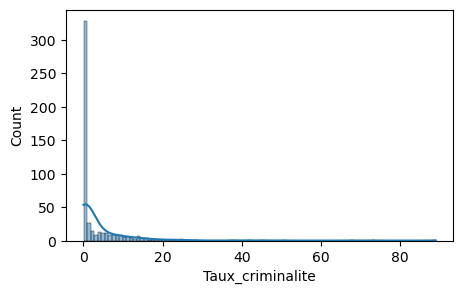

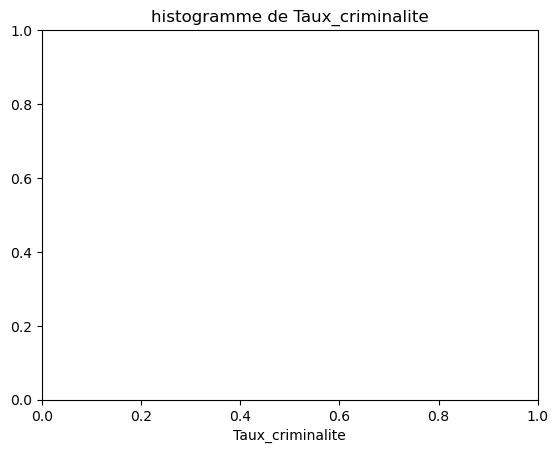

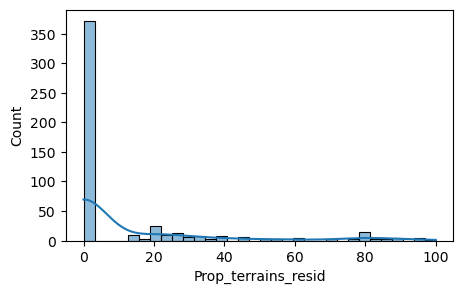

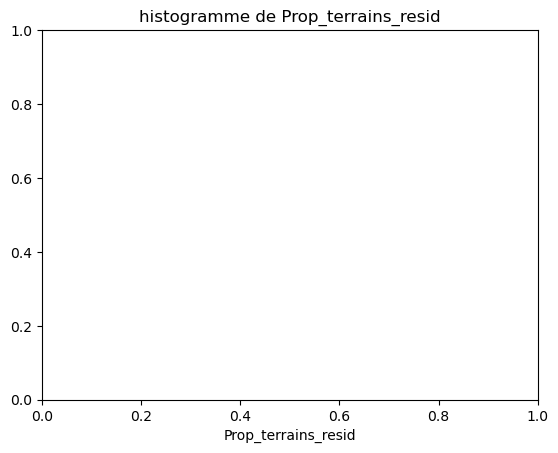

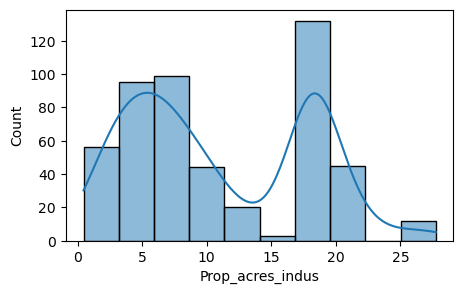

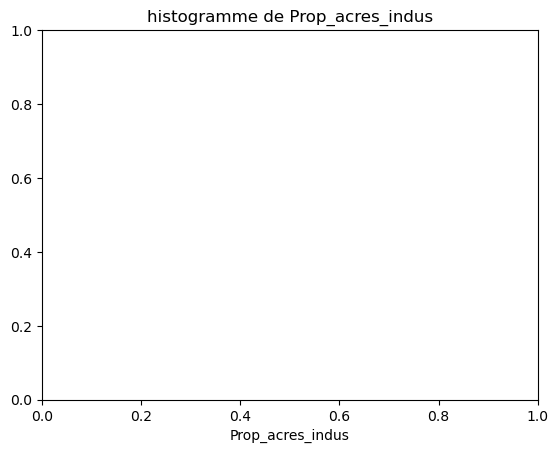

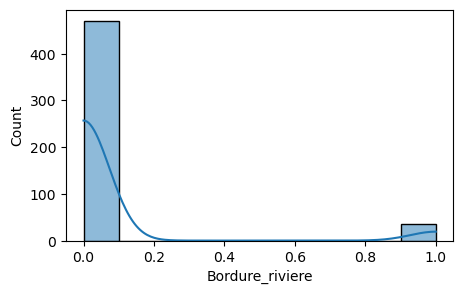

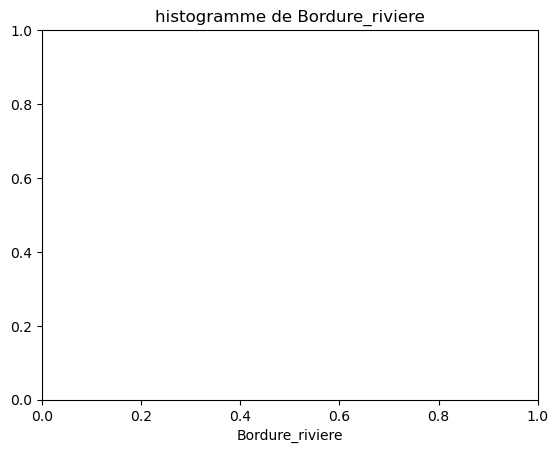

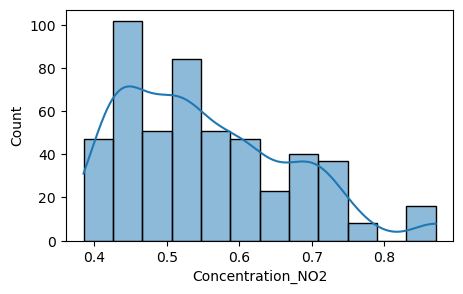

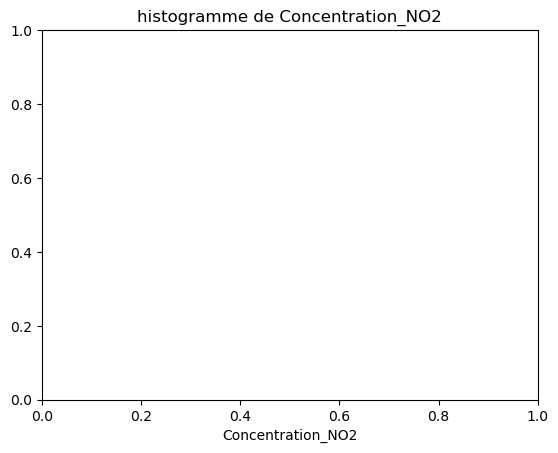

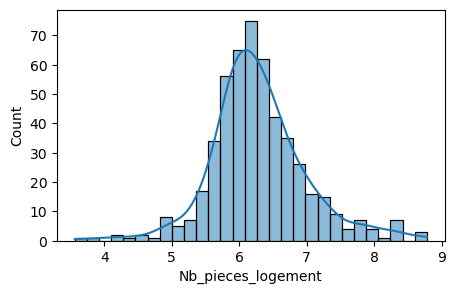

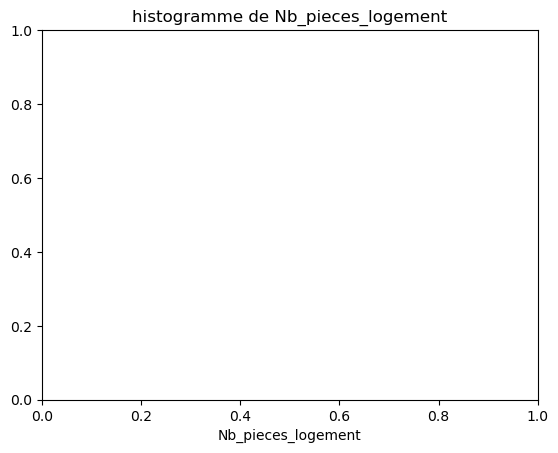

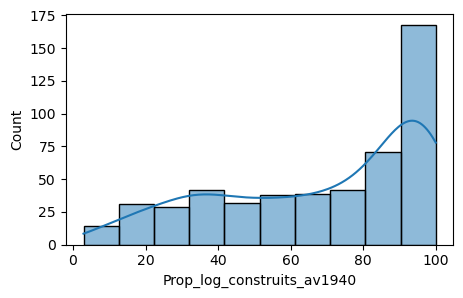

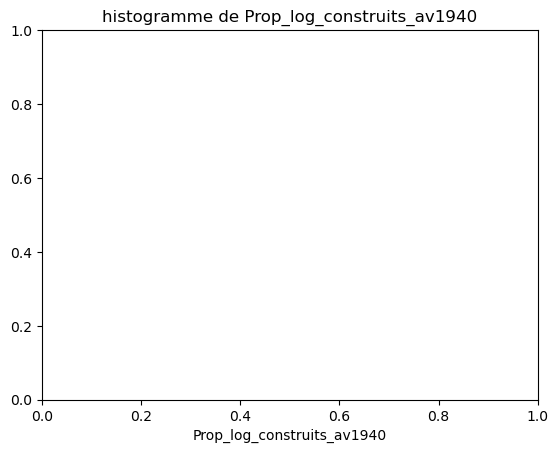

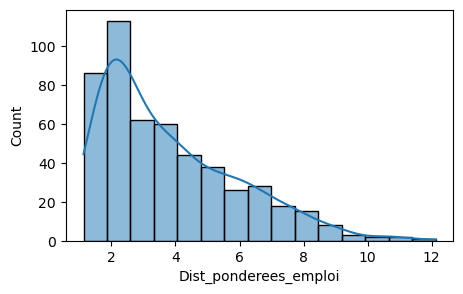

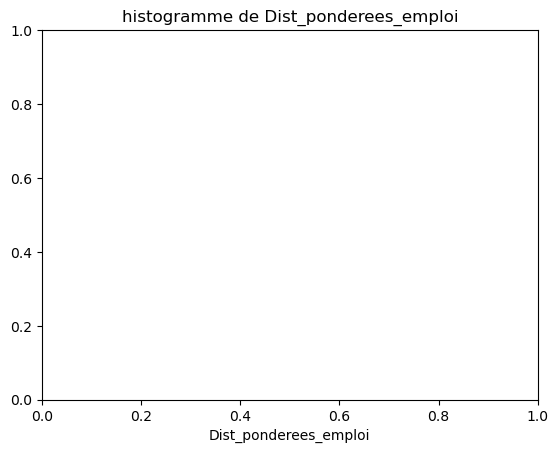

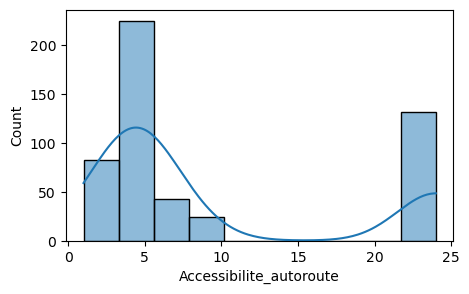

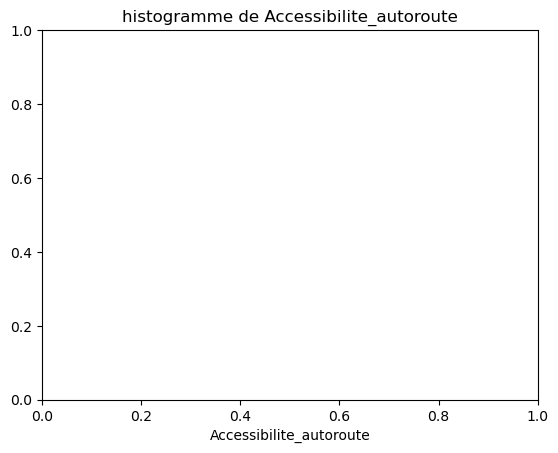

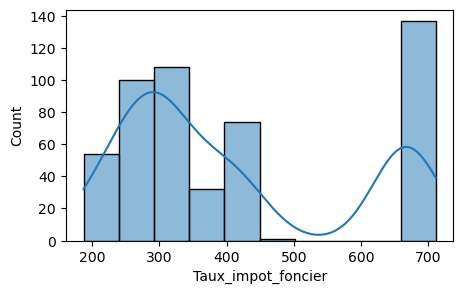

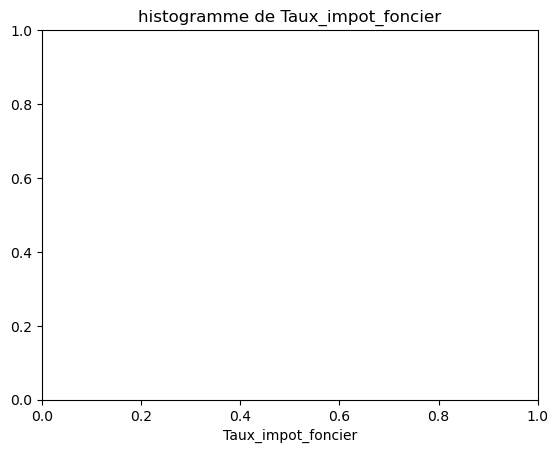

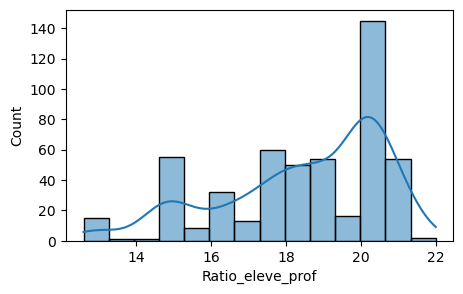

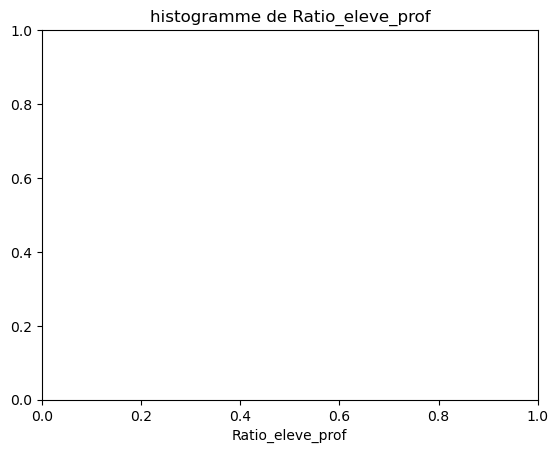

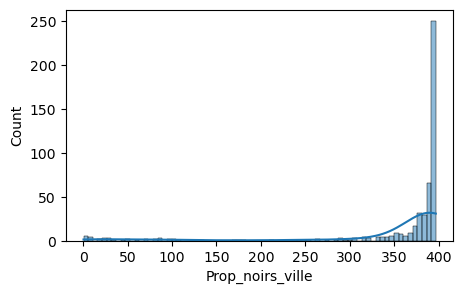

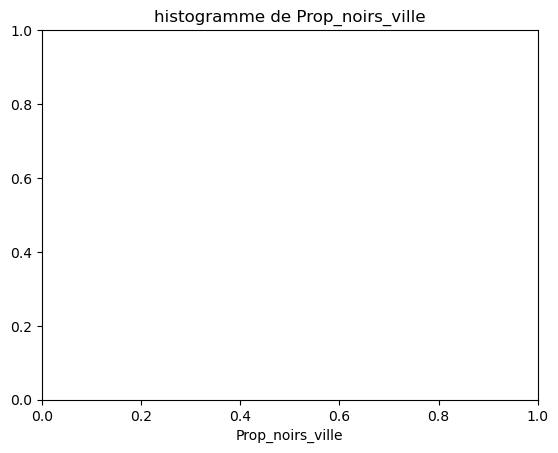

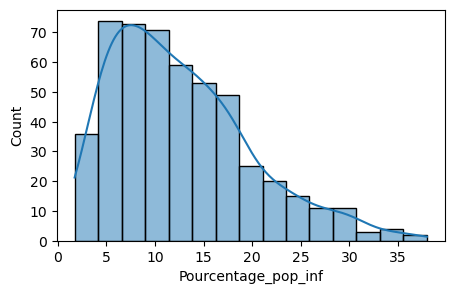

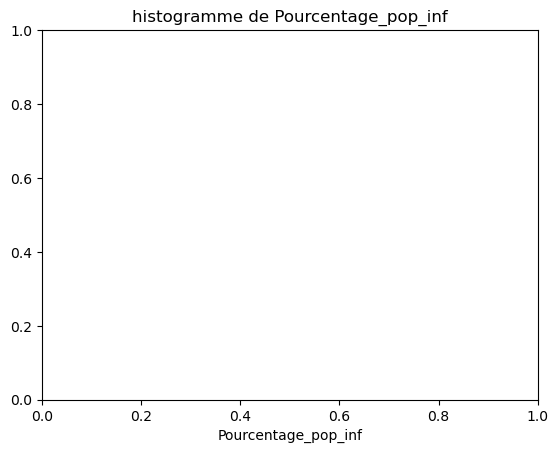

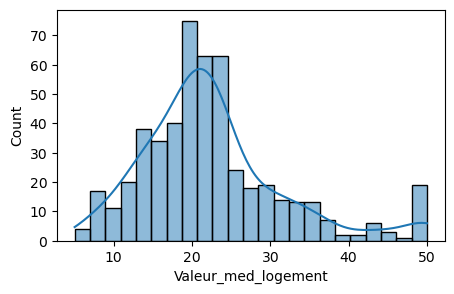

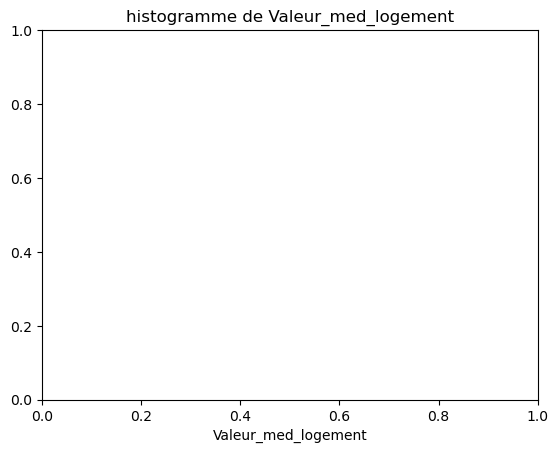

In [8]:
#distribution des variable 
for colunm in data.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(data= data,x=colunm,kde=True)
    plt.show()
    plt.title( f"histogramme de {colunm}")
    plt.xlabel(colunm)

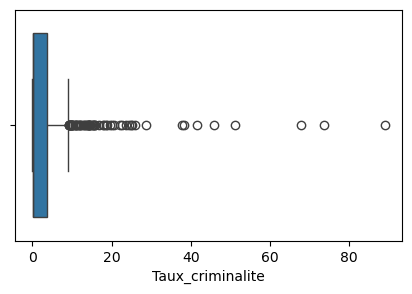

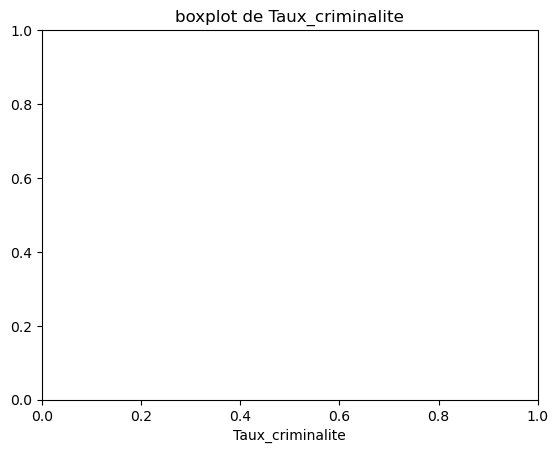

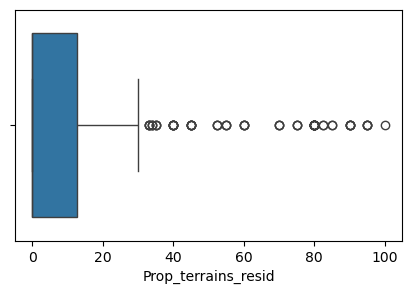

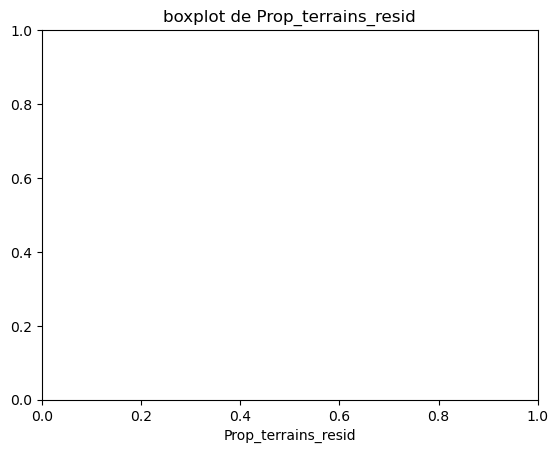

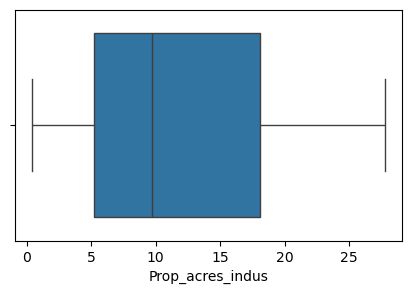

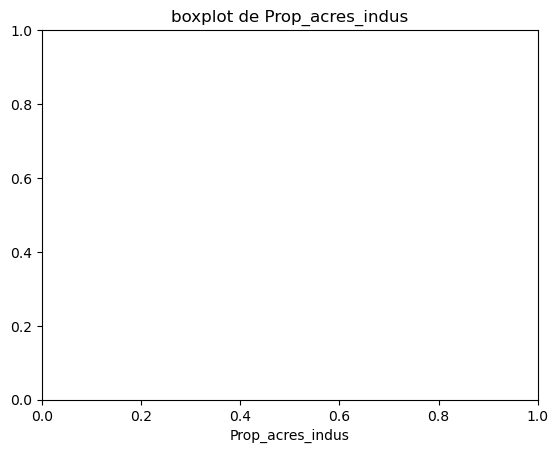

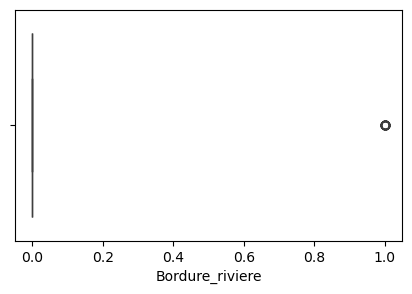

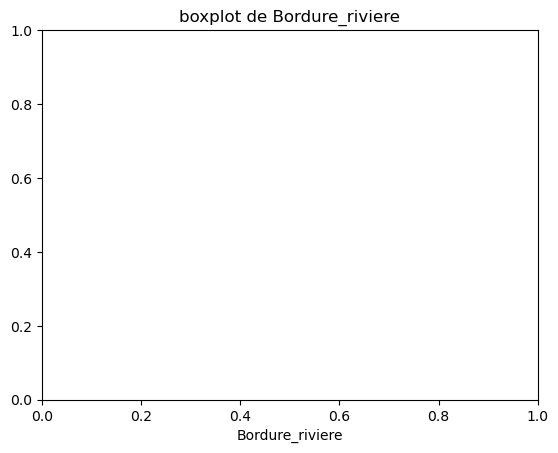

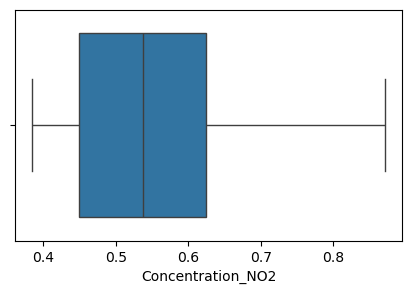

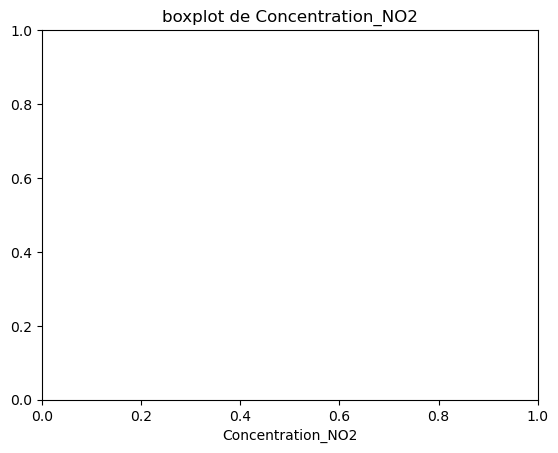

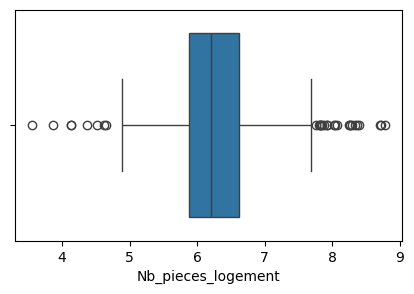

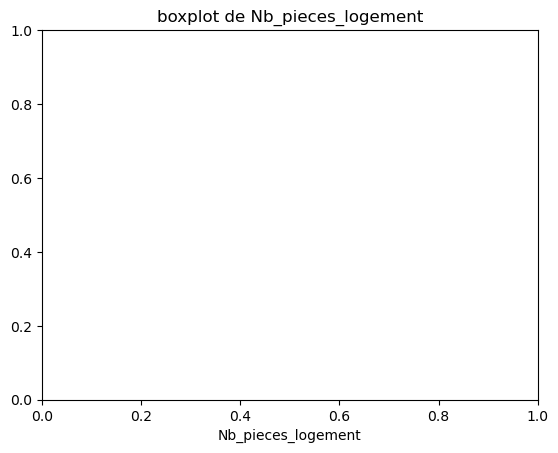

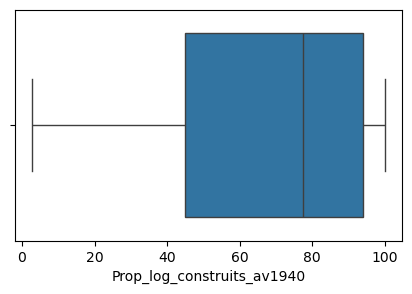

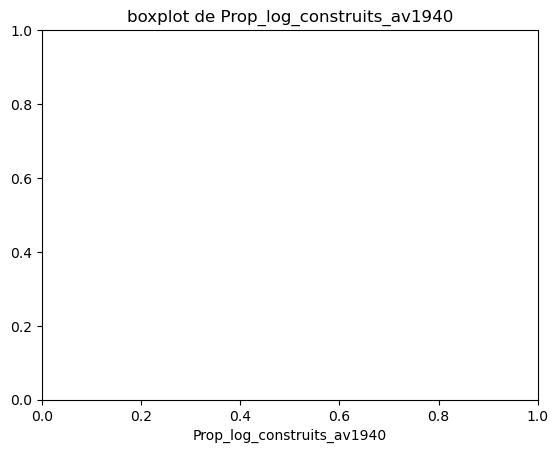

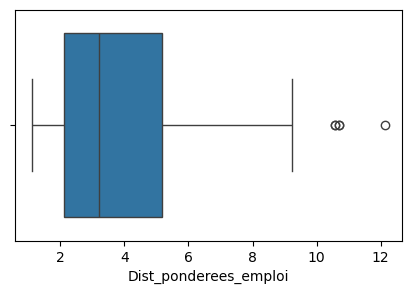

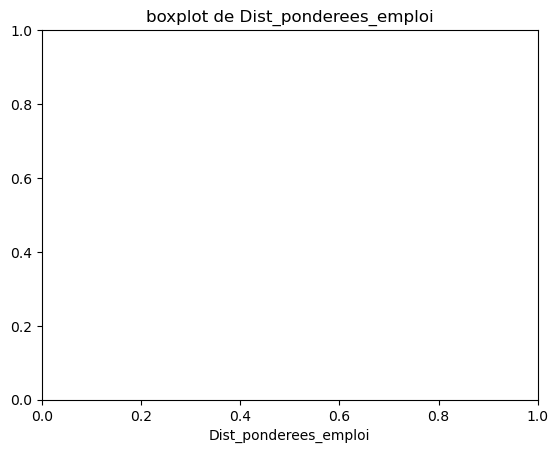

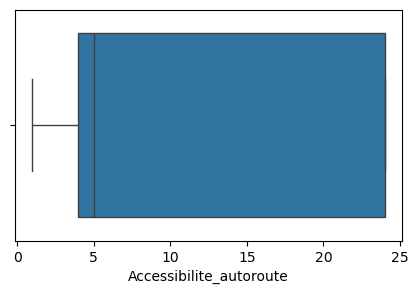

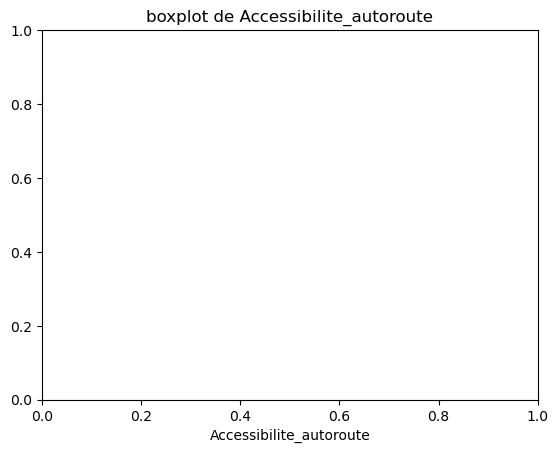

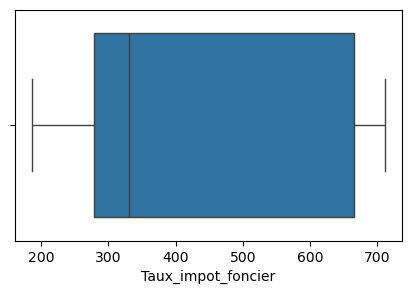

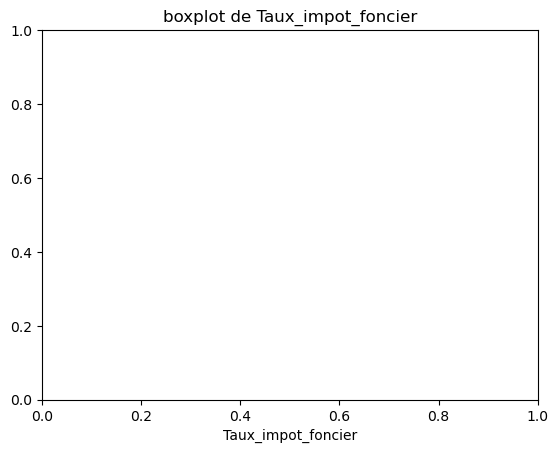

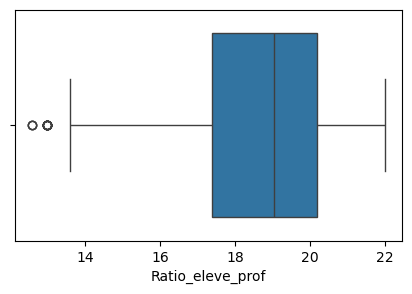

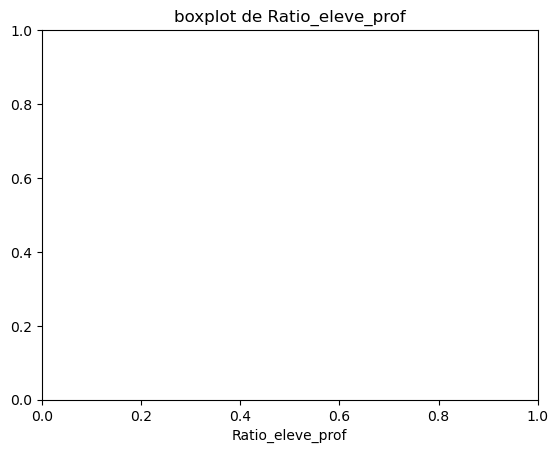

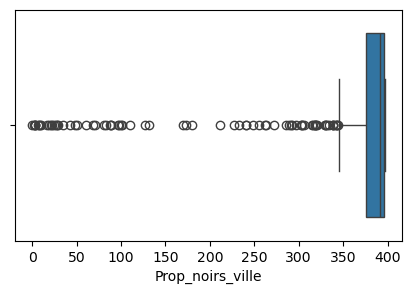

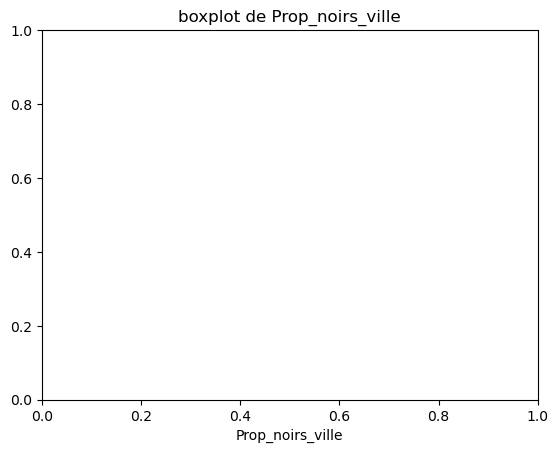

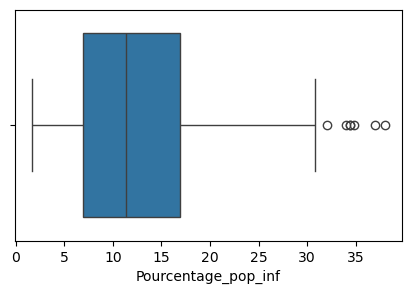

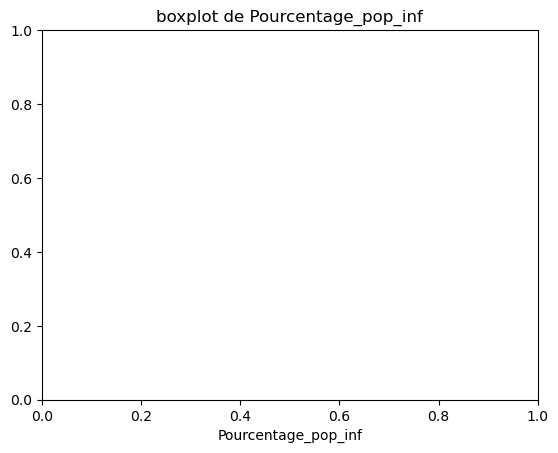

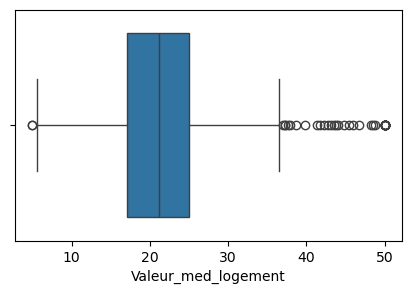

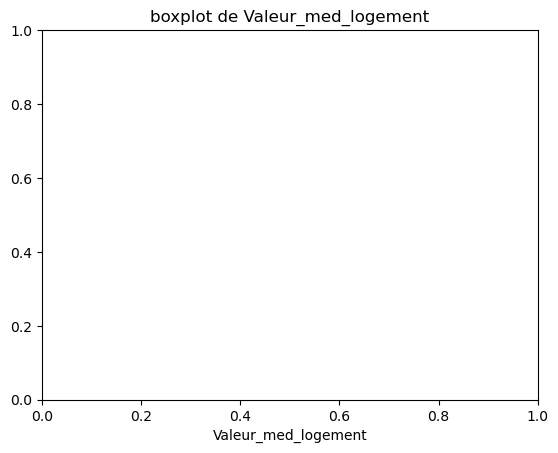

In [9]:
# boxplot des variables 
for colunm in data.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data= data,x=colunm)
    plt.show()
    plt.title( f"boxplot de {colunm}")
    plt.xlabel(colunm)


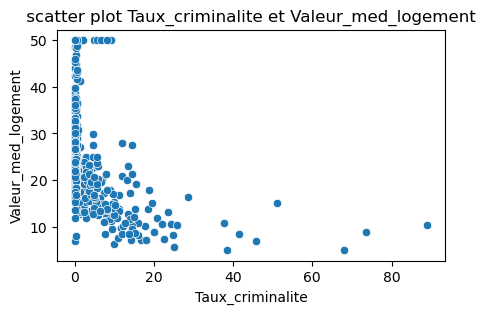

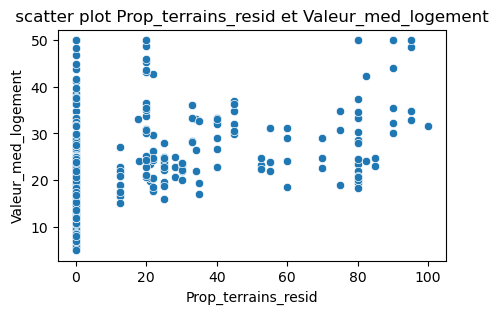

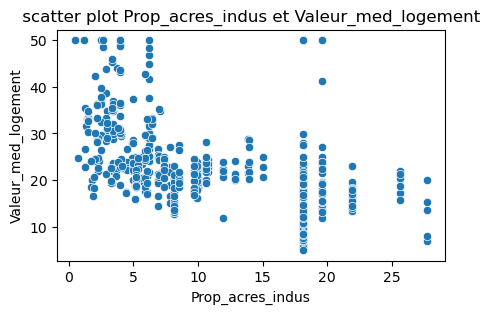

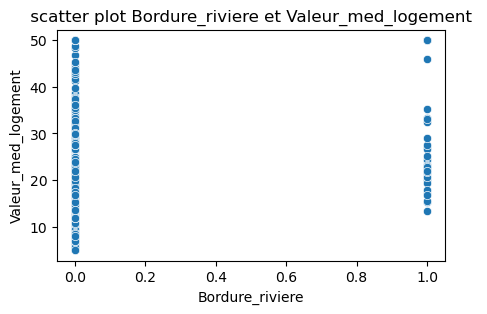

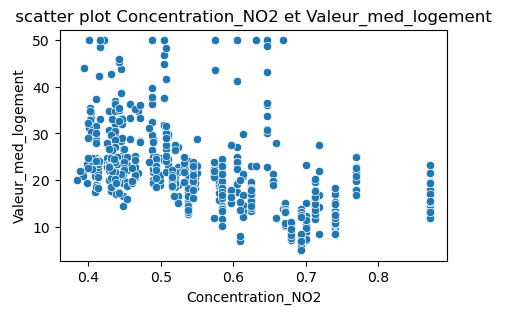

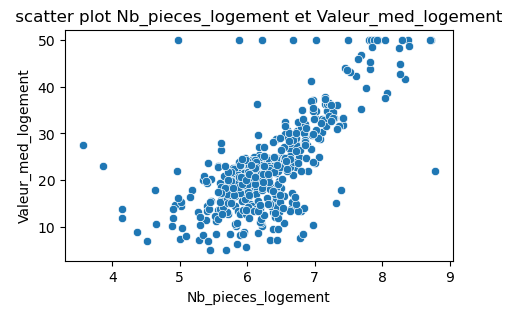

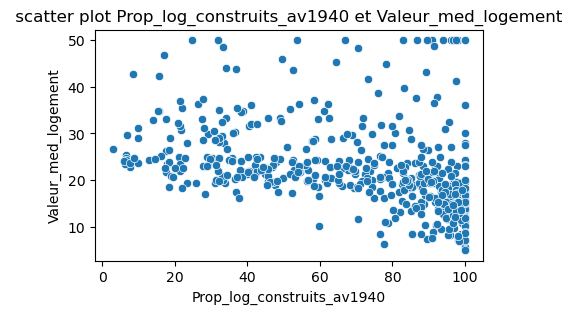

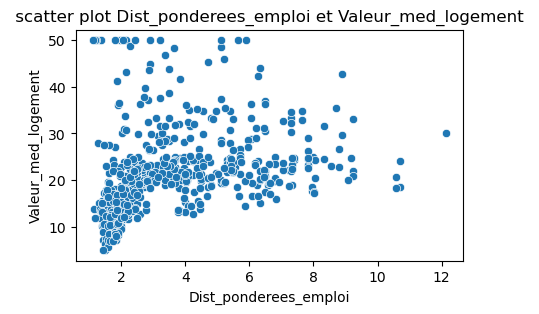

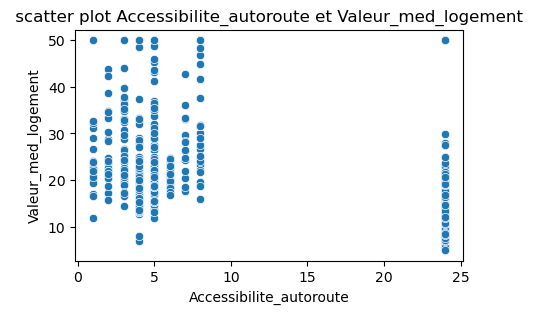

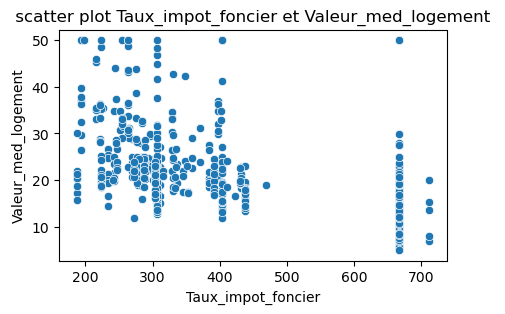

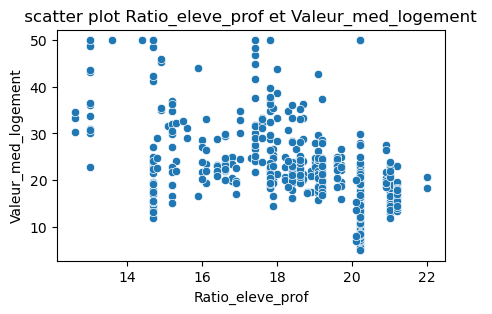

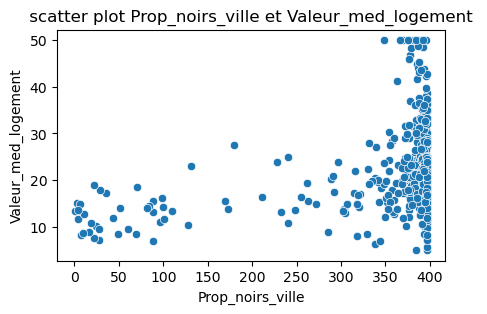

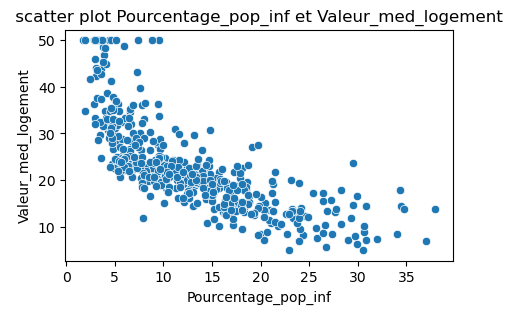

In [10]:
# nuage de point entre Valeur_med_logement et les autres variables 
for col in data.columns:
    if col!='Valeur_med_logement':
        plt.figure(figsize=(5,3))
        sns.scatterplot(data,x=col,y='Valeur_med_logement')
        plt.title(f" scatter plot {col} et Valeur_med_logement ")
        plt.xlabel(col)
        plt.show()

### **corelation entre les variables**


<Axes: >

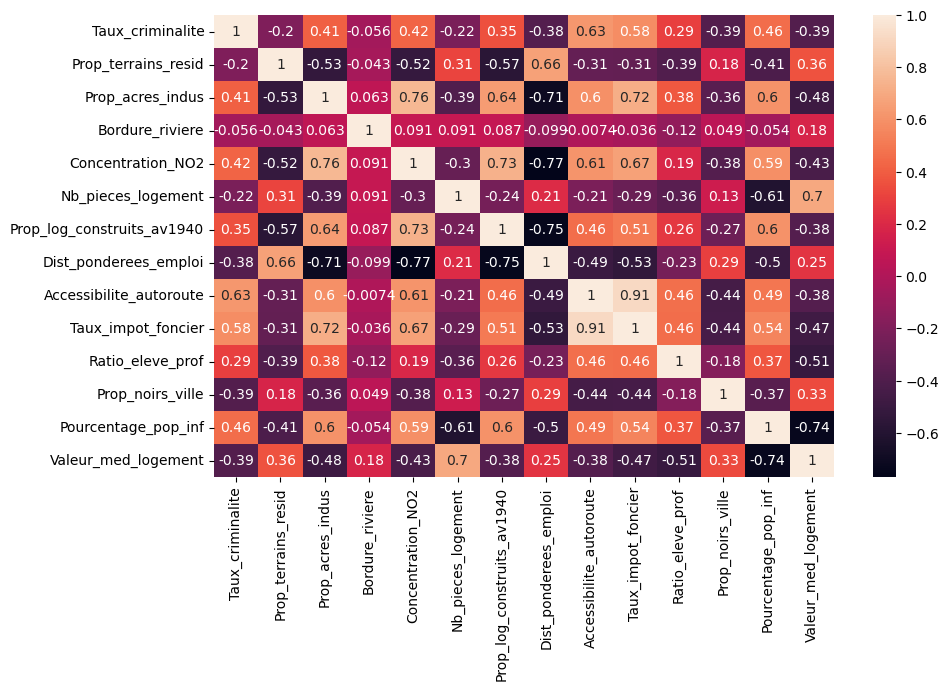

In [12]:
matrice =data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(matrice,annot=True)


In [13]:
# Extraction des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
liste=matrice[abs(matrice['Valeur_med_logement'])>0.6]
print(liste.index.tolist())
liste

['Nb_pieces_logement', 'Pourcentage_pop_inf', 'Valeur_med_logement']


,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
Nb_pieces_logement,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
Pourcentage_pop_inf,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663
Valeur_med_logement,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000


In [14]:
# Extraction des variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt
liste=matrice[abs(matrice["Valeur_med_logement"])<-0.6]
print(liste.index.tolist())


[]


In [15]:
# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_pairs = {} # dico
for col in matrice.columns:
    corr_pairs[col] = []
    liste=matrice[matrice[col]>0.8].index.tolist()
    for pair in liste:
        if pair != col:
            corr_pairs[col].append(pair)


# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)



print(corr_pairs)


Couples de variables ayant une corrélation supérieure à 0.8 :

Accessibilite_autoroute - Taux_impot_foncier
Taux_impot_foncier - Accessibilite_autoroute
{'Taux_criminalite': [], 'Prop_terrains_resid': [], 'Prop_acres_indus': [], 'Bordure_riviere': [], 'Concentration_NO2': [], 'Nb_pieces_logement': [], 'Prop_log_construits_av1940': [], 'Dist_ponderees_emploi': [], 'Accessibilite_autoroute': ['Taux_impot_foncier'], 'Taux_impot_foncier': ['Accessibilite_autoroute'], 'Ratio_eleve_prof': [], 'Prop_noirs_ville': [], 'Pourcentage_pop_inf': [], 'Valeur_med_logement': []}


In [16]:
# Extraction des couples de variables ayant une corrélation inférieure à -0.8
listePair={}
for col in matrice.columns:
    listePair[col]=[]
    listedecol=matrice[abs(matrice[col])<-0.8].index.tolist()
    for element in listedecol:
        if element!=col:
            listePair[col].append(element)

print(listePair)
        

{'Taux_criminalite': [], 'Prop_terrains_resid': [], 'Prop_acres_indus': [], 'Bordure_riviere': [], 'Concentration_NO2': [], 'Nb_pieces_logement': [], 'Prop_log_construits_av1940': [], 'Dist_ponderees_emploi': [], 'Accessibilite_autoroute': [], 'Taux_impot_foncier': [], 'Ratio_eleve_prof': [], 'Prop_noirs_ville': [], 'Pourcentage_pop_inf': [], 'Valeur_med_logement': []}


### **Divison de la base en données train et test**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
train,test=train_test_split(data,test_size=0.2, random_state=42)

### **Sélection des features sur la base train**

In [20]:
train.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


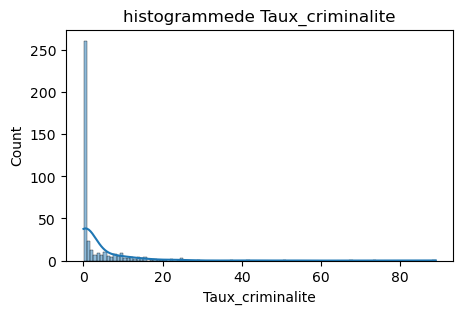

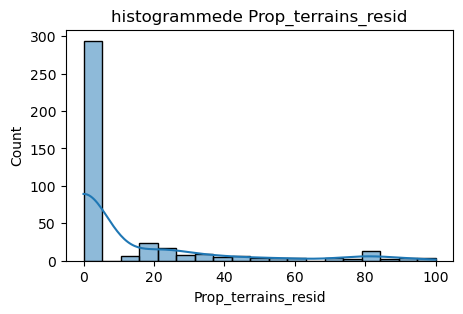

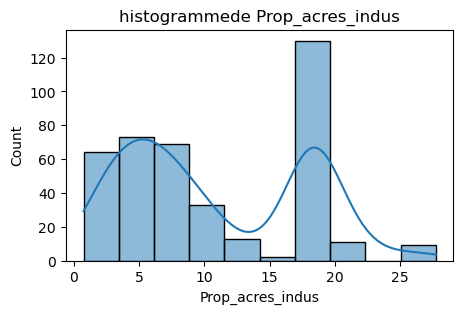

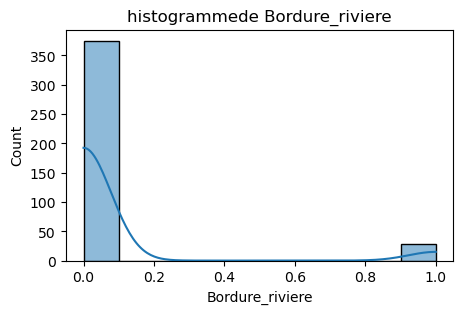

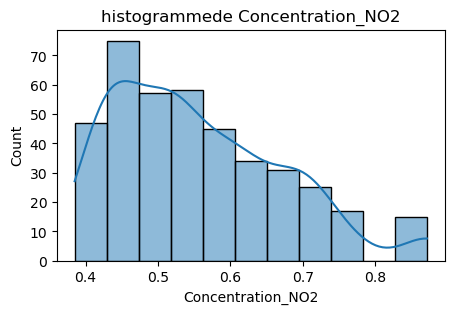

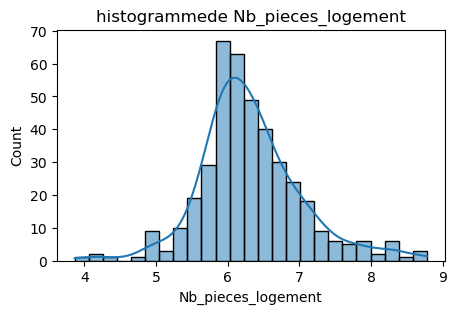

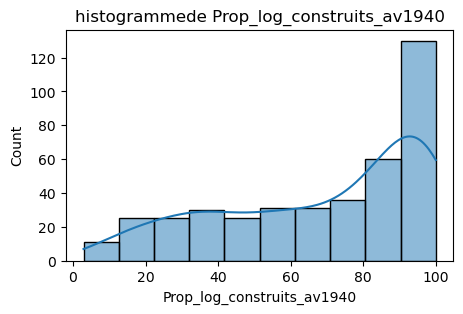

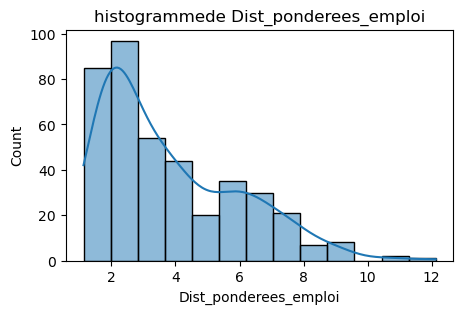

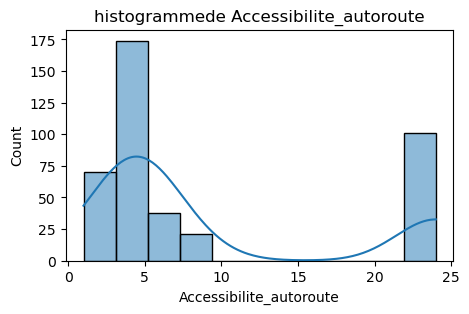

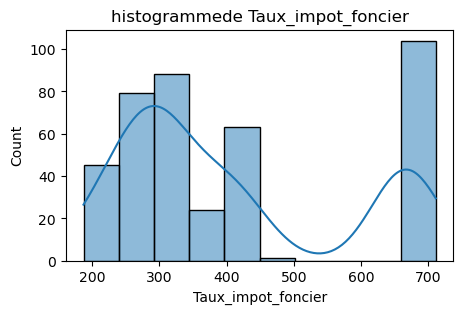

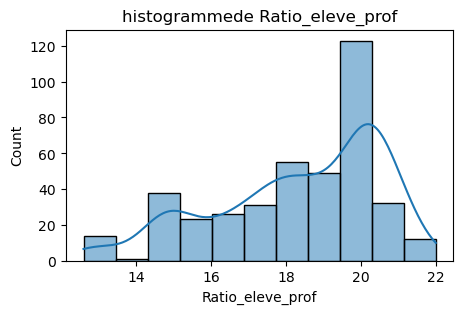

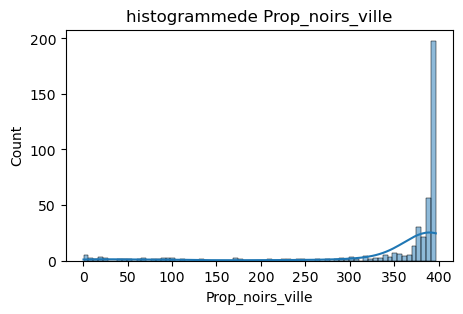

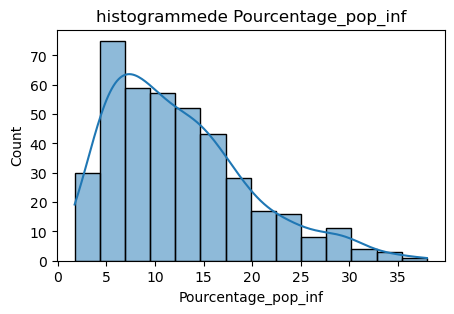

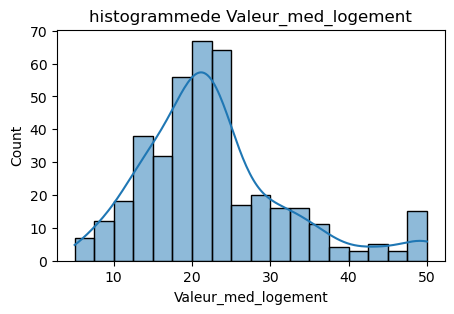

In [21]:
for col in train.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(train,x=col,kde=True)
    plt.title(f"histogrammede {col}")
    plt.xlabel(col)
    plt.show()

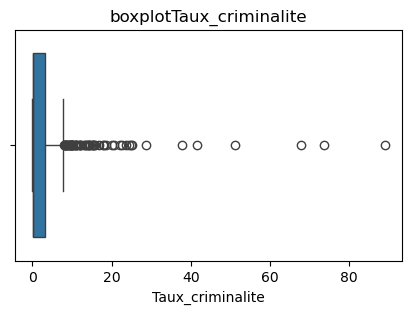

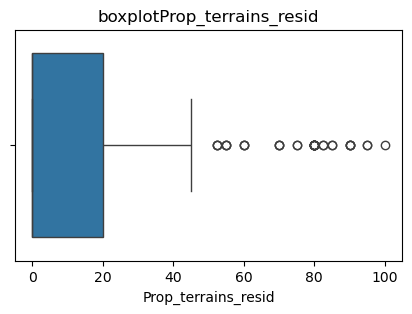

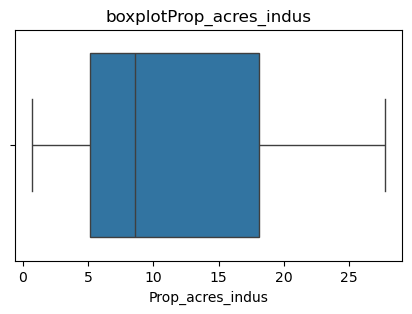

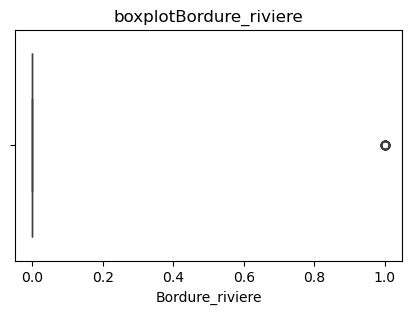

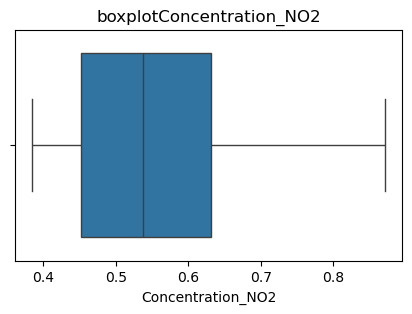

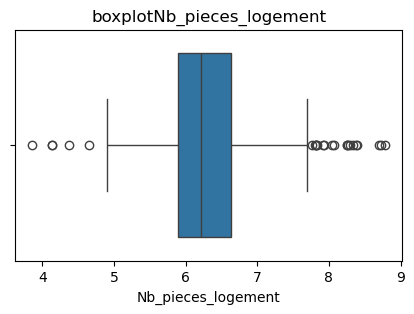

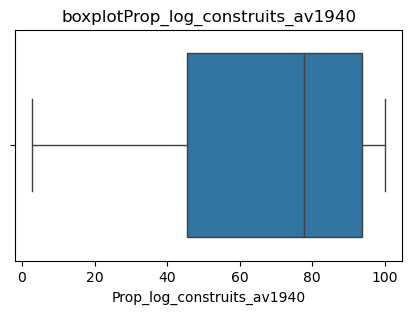

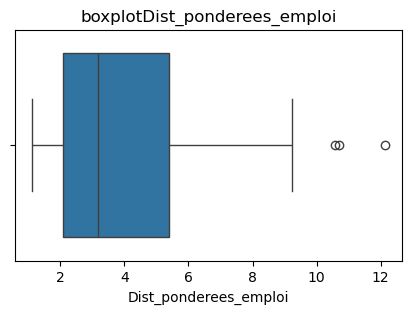

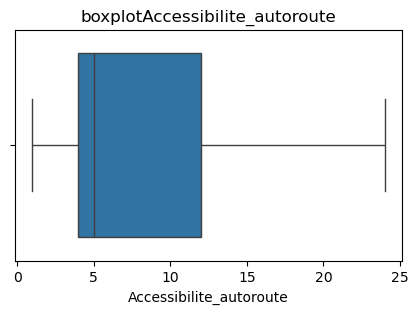

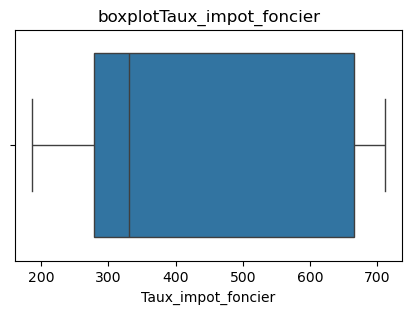

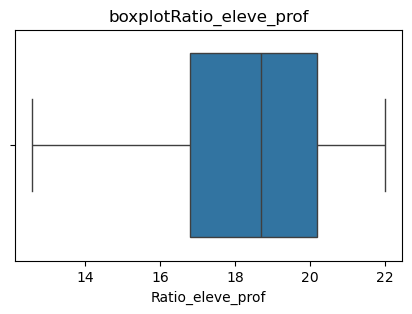

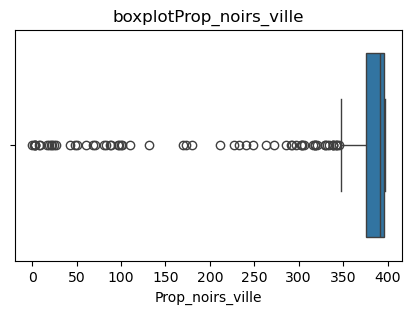

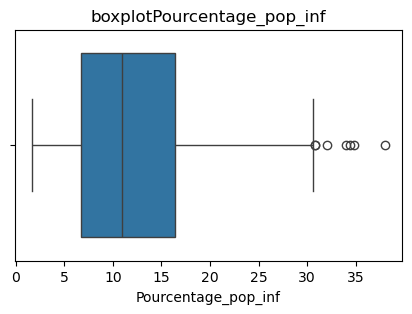

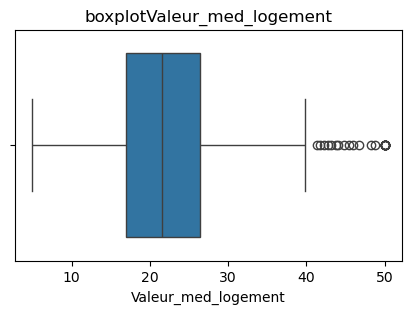

In [22]:
for col in train.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(train,x=col)
    plt.title(f"boxplot{col}")
    plt.xlabel(col)
    plt.show()

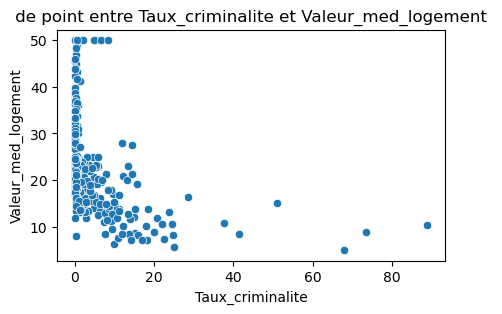

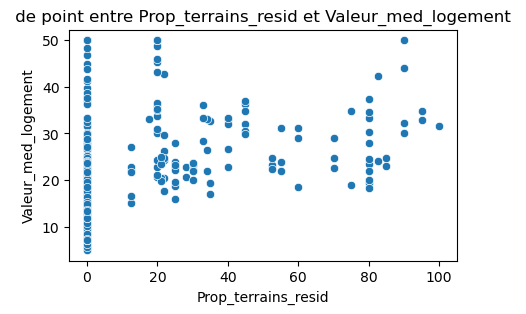

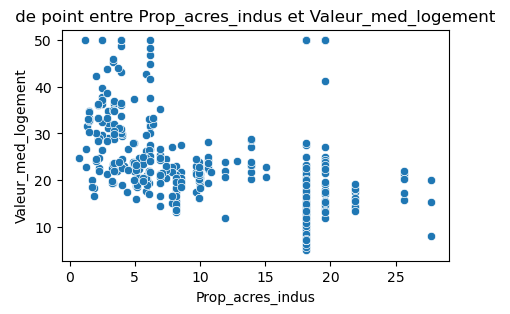

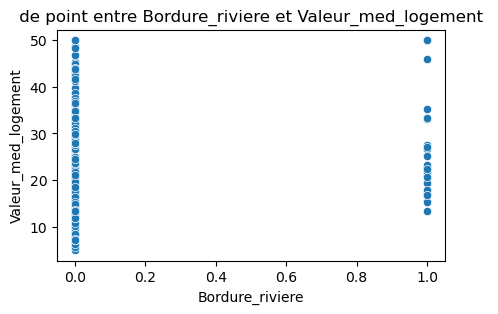

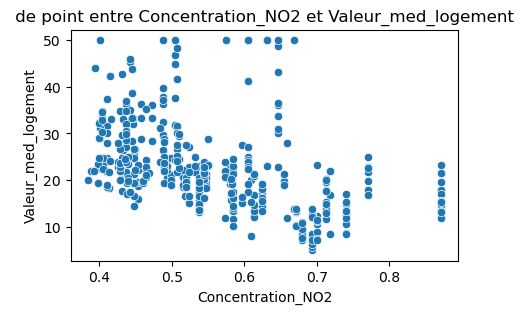

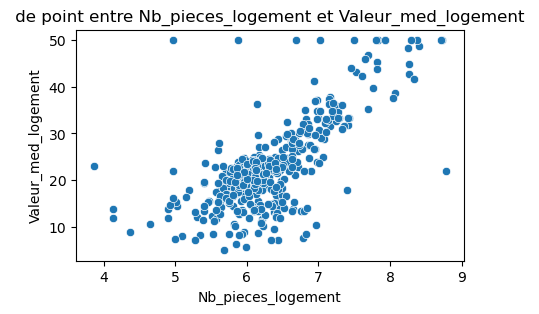

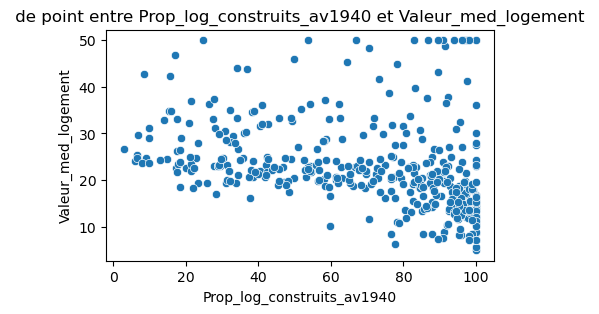

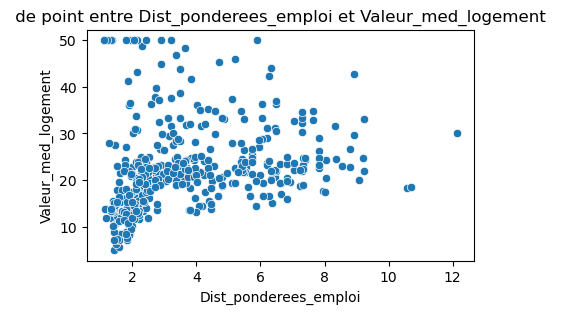

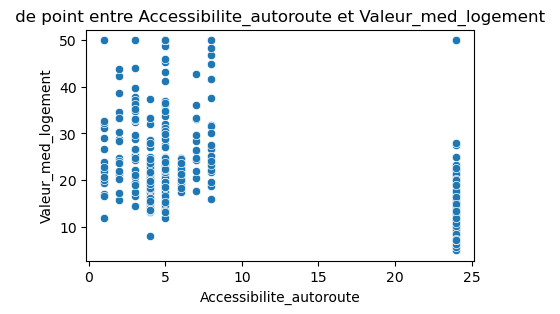

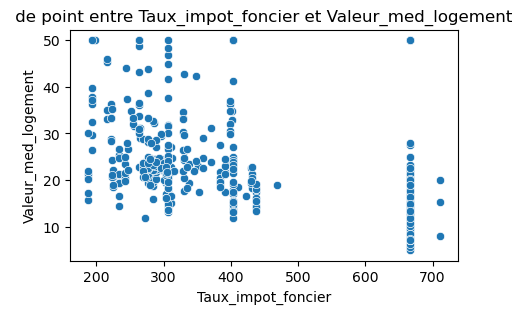

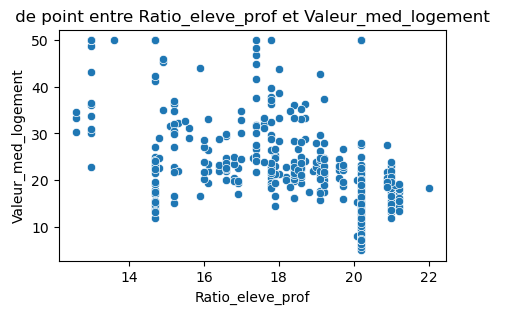

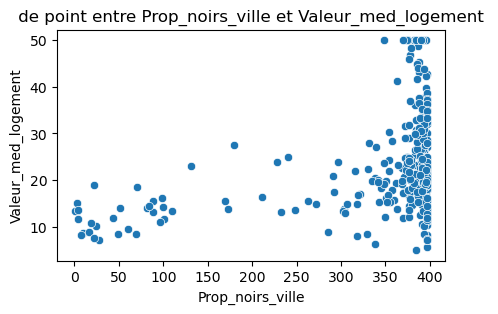

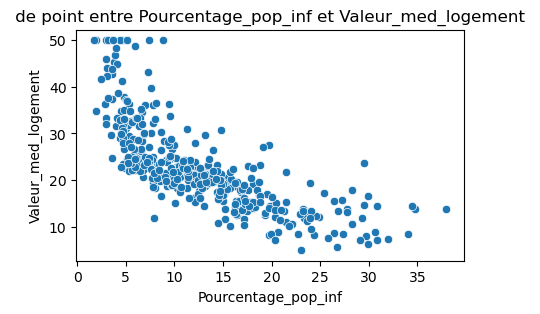

In [23]:
# nuage de point entre Valeur_med_logement et les autres variables 
for col in train.columns:
    if col!='Valeur_med_logement':
        plt.figure(figsize=(5,3))
        sns.scatterplot(train,x=col,y='Valeur_med_logement')
        plt.title(f" de point entre {col} et Valeur_med_logement ")
        plt.xlabel(col)
        plt.show()


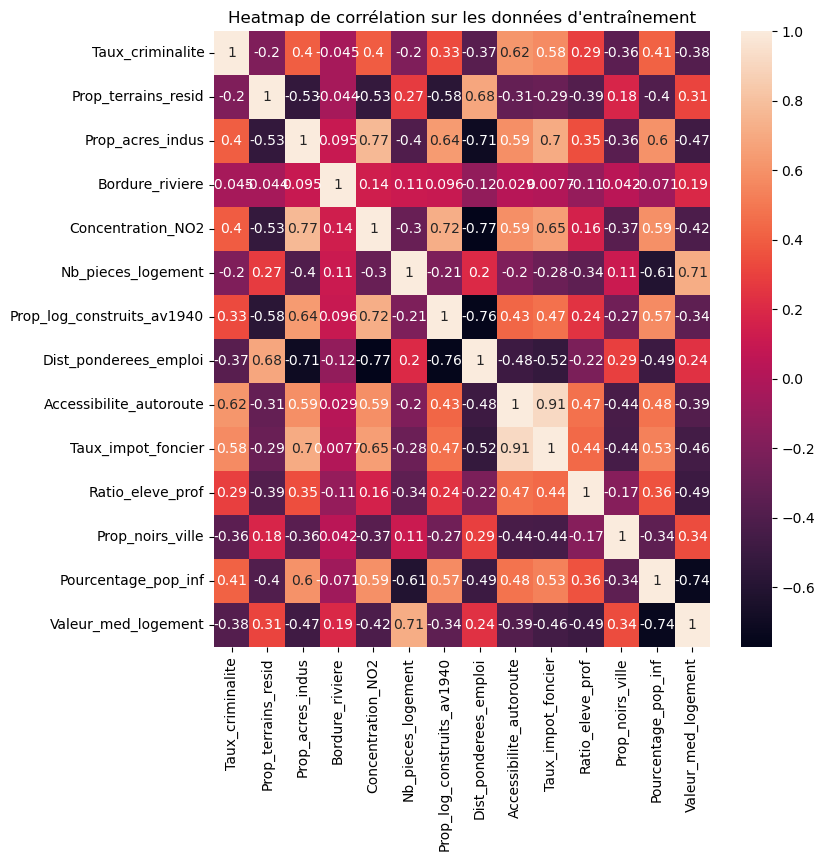

In [24]:
# les correlation 
matrice_corr=train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(matrice_corr,annot=True)
plt.title("Heatmap de corrélation sur les données d'entraînement")
plt.show()

In [25]:
#selection des variables ayant une forte correlatiob avec Valeur_med_logement
listeVariable=matrice_corr[abs(matrice_corr['Valeur_med_logement'])>0.6].index.tolist()
print(f" liste des variables ayante une forte corelation avec listeVariable :  \n {listeVariable}")

 liste des variables ayante une forte corelation avec listeVariable :  
 ['Nb_pieces_logement', 'Pourcentage_pop_inf', 'Valeur_med_logement']


In [26]:
#selection des variables ayant une forte correlatiob avec Valeur_med_logement
listeVariable=matrice_corr[abs(matrice_corr['Valeur_med_logement']) < -0.6].index.tolist()
print(f" liste des variables ayante une forte corelation avec listeVariable :  \n {listeVariable}")

 liste des variables ayante une forte corelation avec listeVariable :  
 []


In [27]:
# couple de variable tres elévé
couple_de_variable={}
for col in matrice_corr.columns:
    couple_de_variable[col]= []
    liste_par_col=matrice_corr[abs(matrice_corr[col]>0.8)].index.tolist()
    for var in liste_par_col:
        if var!=col:
            couple_de_variable[col].append(pair)
            
for col ,couple_de_variable[col] in couple_de_variable.items():
    if len(couple_de_variable[col])>0:
        print (f" {col} - {couple_de_variable[col]}")
    
    

 Accessibilite_autoroute - ['Accessibilite_autoroute']
 Taux_impot_foncier - ['Accessibilite_autoroute']


In [28]:
# couple de variable tres elévé
couple_de_variable={}
for col in matrice_corr.columns:
    couple_de_variable[col]= []
    'Valeur_med_logement'
    for var in liste_par_col:
        if var!=col:
            couple_de_variable[col].append(pair)
            
for col ,couple_de_variable[col] in couple_de_variable.items():
    if len(couple_de_variable[col])>0:
        print (f" {col} - {couple_de_variable[col]}")
    

 Taux_criminalite - ['Accessibilite_autoroute']
 Prop_terrains_resid - ['Accessibilite_autoroute']
 Prop_acres_indus - ['Accessibilite_autoroute']
 Bordure_riviere - ['Accessibilite_autoroute']
 Concentration_NO2 - ['Accessibilite_autoroute']
 Nb_pieces_logement - ['Accessibilite_autoroute']
 Prop_log_construits_av1940 - ['Accessibilite_autoroute']
 Dist_ponderees_emploi - ['Accessibilite_autoroute']
 Accessibilite_autoroute - ['Accessibilite_autoroute']
 Taux_impot_foncier - ['Accessibilite_autoroute']
 Ratio_eleve_prof - ['Accessibilite_autoroute']
 Prop_noirs_ville - ['Accessibilite_autoroute']
 Pourcentage_pop_inf - ['Accessibilite_autoroute']


### **Selection des variables à partir de la corrélation de pearson**


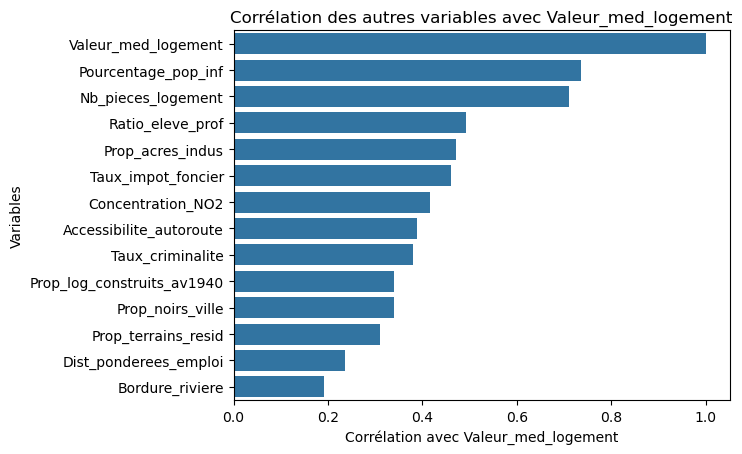

In [30]:
liste = abs(matrice_corr['Valeur_med_logement']).sort_values(ascending=False)

# Affichage sous forme de barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=liste.values, y=liste.index)
plt.ylabel("Variables")
plt.xlabel("Corrélation avec Valeur_med_logement")
plt.title("Corrélation des autres variables avec Valeur_med_logement")
plt.show()

In [31]:
# Séparation des variables prédictives et de la variable cible
X_train = train.drop("Valeur_med_logement",axis=1)
Y_train = train["Valeur_med_logement"]
X_test = test.drop("Valeur_med_logement", axis=1)
Y_test = test["Valeur_med_logement"]
lr_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
results_table = lr_model.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,30.246751,5.676806,5.328128,1.681610e-07,19.085779,41.407723
Taux_criminalite,-0.113056,0.034784,-3.250225,1.253280e-03,-0.181444,-0.044668
Prop_terrains_resid,0.030110,0.015996,1.882358,6.053164e-02,-0.001339,0.061560
Prop_acres_indus,0.040381,0.067365,0.599432,5.492330e-01,-0.092063,0.172825
Bordure_riviere,2.784438,0.955688,2.913544,3.779273e-03,0.905494,4.663382
Concentration_NO2,-17.202633,4.236119,-4.060942,5.909342e-05,-25.531120,-8.874147
Nb_pieces_logement,4.438835,0.463980,9.566874,1.285223e-19,3.526621,5.351050
Prop_log_construits_av1940,-0.006296,0.014568,-0.432204,6.658322e-01,-0.034938,0.022345
Dist_ponderees_emploi,-1.447865,0.225950,-6.407891,4.258552e-10,-1.892099,-1.003632
Accessibilite_autoroute,0.262430,0.075986,3.453638,6.137380e-04,0.113035,0.411824


In [32]:
lr_model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.743
1,Dependent Variable:,Valeur_med_logement,AIC:,2416.6443
2,Date:,2024-12-30 11:05,BIC:,2472.6641
3,No. Observations:,404,Log-Likelihood:,-1194.3
4,Df Model:,13,F-statistic:,90.43
5,Df Residuals:,390,Prob (F-statistic):,6.21e-109
6,R-squared:,0.751,Scale:,22.418


In [33]:
# Obtention des prédictions et des métriques d'évaluation
from sklearn.metrics import mean_absolute_error, root_mean_squared_error,mean_squared_error,r2_score
Y_train_pred=lr_model.predict(sm.add_constant(X_train))
Y_test_pred=lr_model.predict(sm.add_constant(X_test))
r2_train=r2_score(Y_train,Y_train_pred)
r2_test=r2_score(Y_test,Y_test_pred)
Rmse_train=root_mean_squared_error(Y_train,Y_train_pred)
Rmse_test=root_mean_squared_error(Y_test,Y_test_pred)
mae_train=mean_absolute_error(Y_train,Y_train_pred)
mae_test=mean_absolute_error(Y_test,Y_test_pred)
mse_train=mean_squared_error(Y_train,Y_train_pred)
mse_test=mean_squared_error(Y_test,Y_test_pred)

# dataframe pour les resultats
resultat=pd.DataFrame({
    "metrique":["R2","RMSE","MAE","MSE"],
    "Train":[r2_train,Rmse_train, mae_train,mse_train],
    " Test": [r2_test,Rmse_test, mae_test,mse_test]
})
resultat

,metrique,Train,Test
0,R2,0.750886,0.668759
1,RMSE,4.652033,4.928602
2,MAE,3.314772,3.189092
3,MSE,21.641413,24.291119


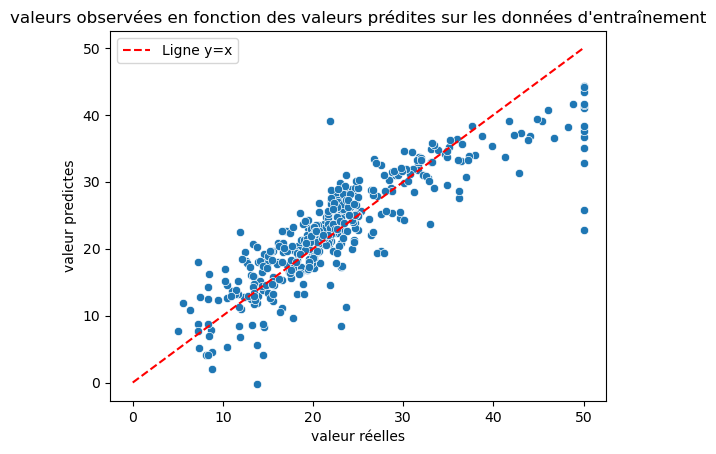

In [34]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
sns.scatterplot(x=Y_train,y=Y_train_pred)
plt.plot([0,50],[0,50],color='red', linestyle='--', label="Ligne y=x")
plt.ylabel("valeur predictes")
plt.xlabel("valeur réelles")
plt.title("valeurs observées en fonction des valeurs prédites sur les données d'entraînement")
plt.legend()
plt.show()

## **Validation des hypothèses**

 #### *1- homoscedacité**

 La variance des residus doit etre constante pour toute les valeurs de la variable independante

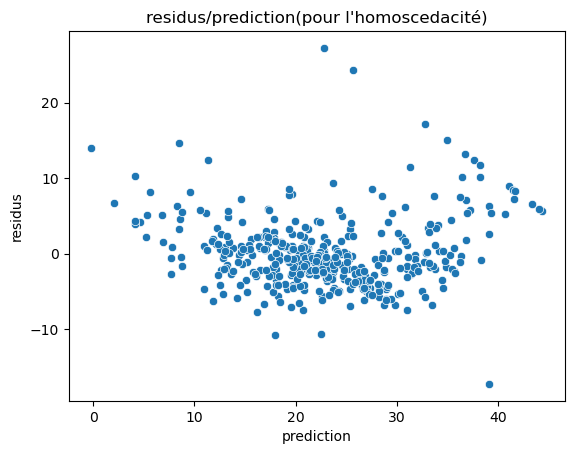

Test de Breusch-Pagan : statistique = 59.189087, p-value = 0.000000


,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf
478,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
16,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
333,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
424,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
20,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
271,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
349,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
436,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [37]:
residus=Y_train-Y_train_pred
sns.scatterplot(y= residus,x=Y_train_pred)
plt.xlabel("prediction")
plt.ylabel("residus")
plt.title("residus/prediction(pour l'homoscedacité)")
plt.show()
# Test de Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(lr_model.resid, lr_model.model.exog)
print("Test de Breusch-Pagan : statistique = %f, p-value = %f" % (bp_test[0], bp_test[1]))
X_train

#### **2-Vérification de la multicolinéarité**

Une variable explicative ne doit pas etre combinaison linéaire des autre variables explicatives (calcul du viF ou de la tolerance )


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Variables"] = X_train.columns
vif

,VIF Factor,Variables
0,1.987996,Taux_criminalite
1,3.075814,Prop_terrains_resid
2,13.741418,Prop_acres_indus
3,1.181392,Bordure_riviere
4,74.807051,Concentration_NO2
5,77.536575,Nb_pieces_logement
6,20.885660,Prop_log_construits_av1940
7,15.299778,Dist_ponderees_emploi
8,15.204351,Accessibilite_autoroute
9,60.960907,Taux_impot_foncier


### **test des autres modèles**

Nous allons juste selectionner les varibles qui ont de forte realtions linéeaires avec la variables cible

In [41]:
new_selection=['Taux_criminalite', 'Prop_terrains_resid','Bordure_riviere','Pourcentage_pop_inf','Nb_pieces_logement']
train2=train[new_selection]
X_train2=train2
train2["Valeur_med_logement"]=train['Valeur_med_logement']
#train2
X_train2


C:\Users\nangs\AppData\Local\Temp\ipykernel_33160\1939495267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2["Valeur_med_logement"]=train['Valeur_med_logement']


,Taux_criminalite,Prop_terrains_resid,Bordure_riviere,Pourcentage_pop_inf,Nb_pieces_logement,Valeur_med_logement
478,15.02340,0.0,0,24.91,5.304,12.0
16,0.62739,0.0,0,8.47,5.834,19.9
333,0.03466,35.0,0,7.83,6.031,19.4
424,7.05042,0.0,0,23.29,6.103,13.4
20,0.72580,0.0,0,11.28,5.727,18.2
...,...,...,...,...,...,...
107,0.17120,0.0,0,18.66,5.836,19.5
271,0.29916,20.0,0,13.00,5.856,21.1
349,0.01501,80.0,0,5.99,6.635,24.5
436,11.16040,0.0,0,23.27,6.629,13.4


In [42]:
model2=sm.OLS(train2["Valeur_med_logement"],sm.add_constant(train[new_selection])).fit()
resutat_model2=model2.summary2().tables[1]
resutat_model2

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-4.456849,3.443081,-1.294436,1.962652e-01,-11.225747,2.312049
Taux_criminalite,-0.120726,0.033224,-3.633660,3.160255e-04,-0.186042,-0.055409
Prop_terrains_resid,0.003962,0.012645,0.313352,7.541775e-01,-0.020897,0.028821
Bordure_riviere,3.973362,1.044607,3.803690,1.649393e-04,1.919724,6.027000
Pourcentage_pop_inf,-0.556914,0.053248,-10.458859,8.813015e-23,-0.661596,-0.452231
Nb_pieces_logement,5.430066,0.480523,11.300332,7.177379e-26,4.485386,6.374746


In [43]:
resultat_global=model2.summary2().tables[0]
resultat_global

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.669
1,Dependent Variable:,Valeur_med_logement,AIC:,2509.9140
2,Date:,2024-12-30 11:05,BIC:,2533.9225
3,No. Observations:,404,Log-Likelihood:,-1249.0
4,Df Model:,5,F-statistic:,164.2
5,Df Residuals:,398,Prob (F-statistic):,2.14e-94
6,R-squared:,0.674,Scale:,28.790


In [44]:
X_test2=test[new_selection]
Y_test2=test['Valeur_med_logement']
Y_train_pred2=model2.predict(sm.add_constant(train[new_selection]))
Y_test_pred2=model2.predict(sm.add_constant(X_test2))
r2_test_model2=r2_score(Y_test2,Y_test_pred2)
r2_train_model2=r2_score(train['Valeur_med_logement'],Y_train_pred2)
Rmse_train_model2=root_mean_squared_error(train['Valeur_med_logement'],Y_train_pred2)
Rmse_test_model2=root_mean_squared_error(Y_test2,Y_test_pred2)
mse_train_model2=mean_squared_error(train['Valeur_med_logement'],Y_train_pred2)
mse_test_model2=mean_squared_error(Y_test2,Y_test_pred2)
mae_train_model2=mean_absolute_error(train['Valeur_med_logement'],Y_train_pred2)
mae_test_model2=mean_absolute_error(Y_test2,Y_test_pred2)

resultat= pd.DataFrame({
    "Metrique":["r2","RMSE","MSE","MAE"],
    "Train":[r2_train_model2,Rmse_train_model2,mse_train_model2,mae_train_model2],
    "Test":[r2_test_model2,Rmse_test_model2,mse_test_model2,mae_test_model2]
})
resultat


,Metrique,Train,Test
0,r2,0.673516,0.577085
1,RMSE,5.325674,5.569019
2,MSE,28.362802,31.013971
3,MAE,3.829289,3.735443


In [45]:
#calcul du VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train[new_selection].values, i) for i in range(train[new_selection].shape[1])]
vif["Variables"] = train[new_selection].columns
vif


,VIF Factor,Variables
0,1.404903,Taux_criminalite
1,1.496354,Prop_terrains_resid
2,1.096236,Bordure_riviere
3,4.377823,Pourcentage_pop_inf
4,4.809735,Nb_pieces_logement


### **verification de la normalité**

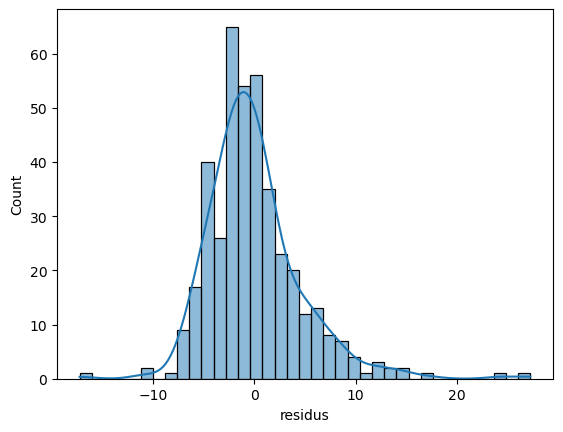

In [47]:
sns.histplot(x=residus,kde=True)
plt.xlabel("residus")
plt.show()


In [48]:
import scipy.stats as stats
# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residus)
print (f"la P_value est :{shapiro_test.pvalue} , est la stat est : {shapiro_test.statistic}")



la P_value est :1.3222205573678591e-14 , est la stat est : 0.911794152648386


#### **les residus ne suivent pas une loi Normale**

### **autocorrelation des erreurs(independance des erreurs(mais generalement pour les series temporelles ))**


In [51]:
from statsmodels.stats.stattools import durbin_watson
# Test d'autocorrélation
dw_test = durbin_watson(lr_model.resid)
print("Test de Durbin-Watson : statistique = %f" % dw_test)

Test de Durbin-Watson : statistique = 2.114123


### **la nuletté de l'esperance des erreurs**

In [53]:
print(residus.mean())

-2.6891580271712703e-14
